loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Helmets-1 in yolov8:: 100%|██████████| 510/510 [00:00<00:00, 4388.28it/s]


Dataset downloaded to: /content/Helmets-1
Visualizing Training Data:


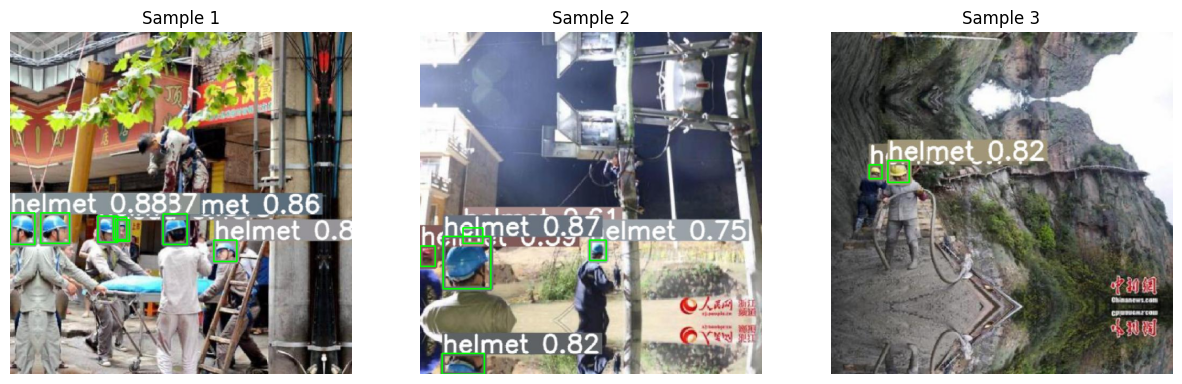

Class Counts (0 usually Helmet, 1 usually No-Helmet):
{0: 599, 1: 236}


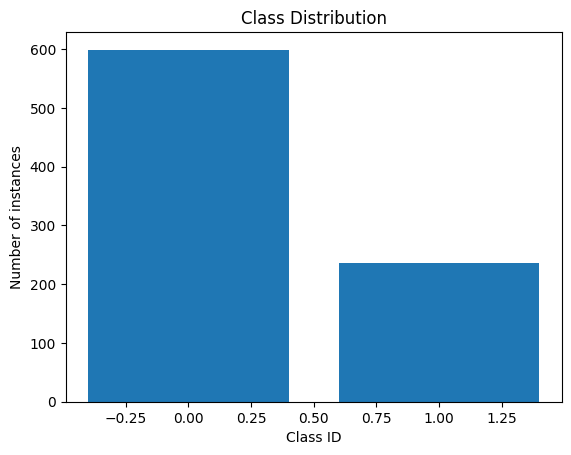

In [6]:
# 01_data_exploration.ipynb

# 1. Install Roboflow
!pip install roboflow matplotlib opencv-python

import os
import cv2
import matplotlib.pyplot as plt
from roboflow import Roboflow
import glob

# ---------------------------------------------------------
# 2. DOWNLOAD DATASET
# ---------------------------------------------------------
# PASTE YOUR ROBOFLOW CODE HERE
# Go to Roboflow > Your Project > Versions > Export > Format: YOLOv8
# It will look like this:
# --- REPLACE THE PLACEHOLDERS BELOW WITH YOUR ACTUAL ROBOFLOW CREDENTIALS ---
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="KCpMcoMPTL2pLqR6hpSG")
project = rf.workspace("group-itai-1378-project").project("helmets-ewjdr-p2lu5")
version = project.version(1)
dataset = version.download("yolov8")


# ----------------------------------------------------------------------------
dataset = version.download("yolov8")

# Define paths (Adjust if your folder name is different)
dataset_path = dataset.location  # This usually returns the absolute path
train_images_path = os.path.join(dataset_path, 'train', 'images')
train_labels_path = os.path.join(dataset_path, 'train', 'labels')

print(f"Dataset downloaded to: {dataset_path}")

# ---------------------------------------------------------
# 3. VISUALIZE SAMPLES
# ---------------------------------------------------------
def view_random_samples(image_dir, label_dir, num_samples=3):
    image_files = glob.glob(os.path.join(image_dir, '*.jpg'))

    plt.figure(figsize=(15, 5))

    for i in range(num_samples):
        # Read image
        img_path = image_files[i]
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        h, w, _ = img.shape

        # Read label
        label_path = os.path.join(label_dir, os.path.basename(img_path).replace('.jpg', '.txt'))

        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                lines = f.readlines()
                for line in lines:
                    # YOLO format: class x_center y_center width height (normalized)
                    cls, x, y, bw, bh = map(float, line.split())

                    # Convert to pixel coordinates
                    x1 = int((x - bw/2) * w)
                    y1 = int((y - bh/2) * h)
                    x2 = int((x + bw/2) * w)
                    y2 = int((y + bh/2) * h)

                    # Draw box (Green for all for now)
                    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

        plt.subplot(1, 3, i+1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Sample {i+1}")

    plt.show()

print("Visualizing Training Data:")
view_random_samples(train_images_path, train_labels_path)

# ---------------------------------------------------------
# 4. CLASS DISTRIBUTION
# ---------------------------------------------------------
# Count how many helmets vs no-helmets
class_counts = {}
label_files = glob.glob(os.path.join(train_labels_path, '*.txt'))

for file in label_files:
    with open(file, 'r') as f:
        lines = f.readlines()
        for line in lines:
            cls = int(line.split()[0])
            class_counts[cls] = class_counts.get(cls, 0) + 1

# NOTE: Check your data.yaml to see which ID corresponds to which name
print("Class Counts (0 usually Helmet, 1 usually No-Helmet):")
# print classes from data.yaml if available, otherwise use default mapping
# For example, if you have a data.yaml, you can load it to get class names
# import yaml
# with open(os.path.join(dataset_path, 'data.yaml'), 'r') as f:
#     data_yaml = yaml.safe_load(f)
# class_names = data_yaml['names']
# for cls_id, count in class_counts.items():
#     print(f"  {class_names[cls_id]}: {count}")
print(class_counts)

plt.bar(class_counts.keys(), class_counts.values())
plt.title("Class Distribution")
plt.xlabel("Class ID")
plt.ylabel("Number of instances")
plt.show()